In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
import datetime

# Data Exploration

Let's start by importing the data:

In [56]:
data = pd.read_csv("../data/eurlex/combined.csv", sep=",", quotechar="'")
data = data.astype({
    'form': 'category'
})

data['date'        ] = pd.to_datetime(data['date'        ])
data['oj_date'     ] = pd.to_datetime(data['oj_date'     ])
data['of_effect'   ] = pd.to_datetime(data['of_effect'   ])
data['end_validity'] = pd.to_datetime(data['end_validity'])

## Basic statistics

Number of documents:

In [57]:
len(data)

126472

Number of missing elements:

In [58]:
total = data.isnull().sum()
percent = data.isnull().sum()/data.isnull().count()*100.0
missing_data = pd.concat([total, percent], axis=1, keys=['Count', 'Percent'])
print(missing_data)

                     Count    Percent
celex                    0   0.000000
form                     0   0.000000
date                  1990   1.573471
title                    2   0.001581
oj_date               2929   2.315928
of_effect            19308  15.266620
end_validity         31480  24.890885
addressee            99080  78.341451
subject_matter       29250  23.127649
directory_codes      37753  29.850876
eurovoc_descriptors  33586  26.556076
legal_basis           9412   7.441963
relationships         1089   0.861060
text                     0   0.000000


### form

In [59]:
data['form'].describe()

count        126472
unique            1
top       Agreement
freq         126472
Name: form, dtype: object

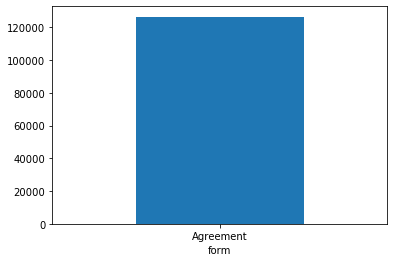

In [60]:
data.groupby('form').size().plot(kind='bar', rot=0)

### date

In [61]:
data['date'].describe(datetime_is_numeric=True)

count                           124482
mean     1995-03-20 02:01:34.047332096
min                1949-09-24 00:00:00
25%                1986-06-23 00:00:00
50%                1997-03-10 00:00:00
75%                2004-04-21 00:00:00
max                2013-10-04 00:00:00
Name: date, dtype: object

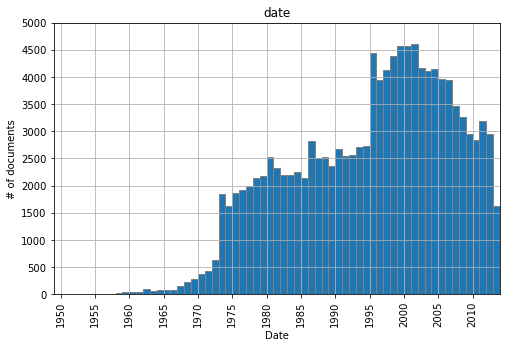

In [111]:
ax = data['date'].hist(bins=65, edgecolor='grey', range=(datetime.date(1949, 1, 1), datetime.date(2014, 1, 1)), figsize=(8,5))
ax.xaxis.set_major_locator(mdates.YearLocator(5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.set_xlim([datetime.date(1949, 1, 1), datetime.date(2014, 1, 1)])
ax.set_ylim([0, 5000])
plt.title('date')
plt.xlabel('Date')
plt.ylabel('# of documents')
plt.xticks(rotation=90)
plt.yticks(range(0, 5001, 500));

### title

In [90]:
data['title'].str.len().describe()

count    126470.000000
mean        210.570001
std          79.375457
min           6.000000
25%         157.000000
50%         199.000000
75%         250.000000
max        1531.000000
Name: title, dtype: float64

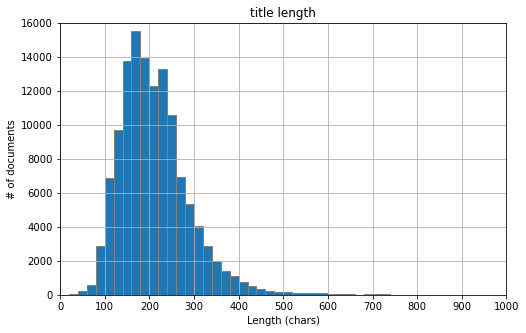

In [110]:
ax = data['title'].str.len().hist(bins=50, edgecolor='grey', range=(0, 1000), figsize=(8,5))
ax.set_xlim([0, 1000])
ax.set_ylim([0, 16000])
plt.title('title length')
plt.xlabel('Length (chars)')
plt.ylabel('# of documents')
plt.xticks(range(0, 1001, 100));

### oj_date

In [64]:
data['oj_date'].describe(datetime_is_numeric=True)

count                        123543
mean     1995-03-01 20:52:19.739200
min             1952-12-30 00:00:00
25%             1986-06-21 00:00:00
50%             1997-01-25 00:00:00
75%             2004-02-27 00:00:00
max             2013-10-22 00:00:00
Name: oj_date, dtype: object

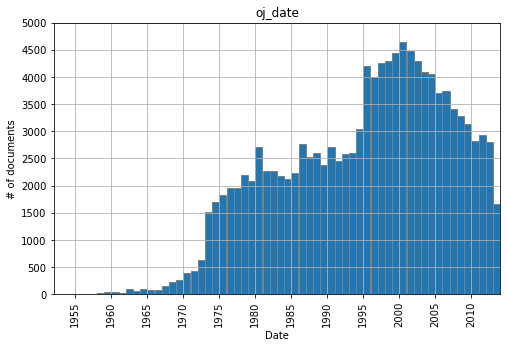

In [115]:
ax = data['oj_date'].hist(bins=62, edgecolor='grey', range=(datetime.date(1952, 1, 1), datetime.date(2014, 1, 1)), figsize=(8,5))
ax.xaxis.set_major_locator(mdates.YearLocator(5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.set_xlim([datetime.date(1952, 1, 1), datetime.date(2014, 1, 1)])
ax.set_ylim([0, 5000])
plt.title('oj_date')
plt.xlabel('Date')
plt.ylabel('# of documents')
plt.xticks(rotation=90)
plt.yticks(range(0, 5001, 500));

### of_effect

In [65]:
data['of_effect'].describe(datetime_is_numeric=True)

count                           107164
mean     1995-09-21 11:55:19.428166272
min                1953-01-01 00:00:00
25%                1987-10-01 00:00:00
50%                1997-06-24 00:00:00
75%                2004-05-07 00:00:00
max                2017-01-01 00:00:00
Name: of_effect, dtype: object

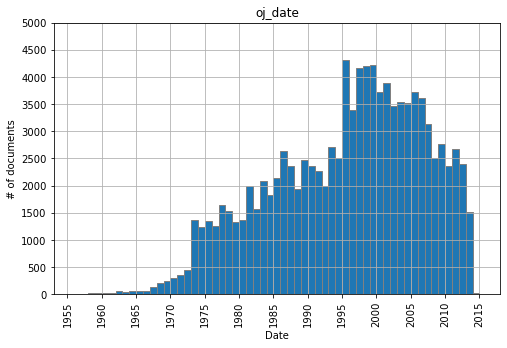

In [118]:
ax = data['of_effect'].hist(bins=65, edgecolor='grey', range=(datetime.date(1953, 1, 1), datetime.date(2018, 1, 1)), figsize=(8,5))
ax.xaxis.set_major_locator(mdates.YearLocator(5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.set_xlim([datetime.date(1953, 1, 1), datetime.date(2018, 1, 1)])
ax.set_ylim([0, 5000])
plt.title('oj_date')
plt.xlabel('Date')
plt.ylabel('# of documents')
plt.xticks(rotation=90)
plt.yticks(range(0, 5001, 500));

### end_validity

In [129]:
valid_end_validity = data[data['end_validity'] != pd.to_datetime("2100-01-01")]['end_validity']
valid_end_validity.describe(datetime_is_numeric=True)

count                            59600
mean     1992-03-03 09:24:08.214765056
min                1954-01-07 00:00:00
25%                1982-12-31 00:00:00
50%                1991-11-30 00:00:00
75%                2000-02-29 00:00:00
max                2058-12-31 00:00:00
Name: end_validity, dtype: object

In [130]:
invalid_end_validity = data[data['end_validity'] == pd.to_datetime("2100-01-01")]['end_validity']
invalid_end_validity.count()

35392

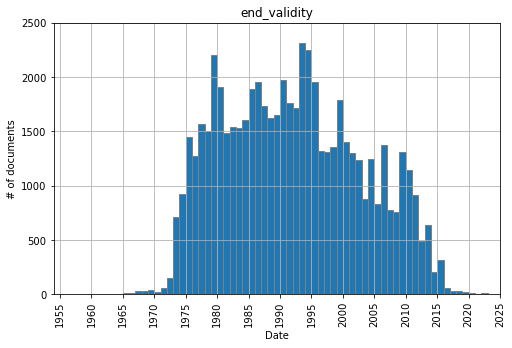

In [135]:
ax = valid_end_validity.hist(bins=104, edgecolor='grey', range=(datetime.date(1954, 1, 1), datetime.date(2058, 1, 1)), figsize=(8,5))
ax.xaxis.set_major_locator(mdates.YearLocator(5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.set_xlim([datetime.date(1954, 1, 1), datetime.date(2025, 1, 1)])
ax.set_ylim([0, 2500])
plt.title('end_validity')
plt.xlabel('Date')
plt.ylabel('# of documents')
plt.xticks(rotation=90)
plt.yticks(range(0, 2501, 500));

### addressee

In [136]:
data['addressee'].str.len().describe()

count    27392.000000
mean        26.002884
std         27.599444
min          5.000000
25%         14.000000
50%         17.000000
75%         27.000000
max        255.000000
Name: addressee, dtype: float64

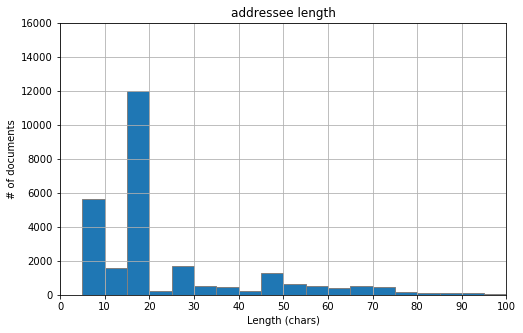

In [149]:
ax = data['addressee'].str.len().hist(bins=30, edgecolor='grey', range=(0, 150), figsize=(8,5))
ax.set_xlim([0, 100])
ax.set_ylim([0, 16000])
plt.title('addressee length')
plt.xlabel('Length (chars)')
plt.ylabel('# of documents')
plt.xticks(range(0, 101, 10));

## Histogram Subject - to fix

In [68]:
# df.groupby('subject_matter').size(3).plot(kind='bar', rot=0)
data['subject_matter'].value_counts()[data['subject_matter'].value_counts().head(10)].index

Index(['Agricultural structures;Agriculture;Beef and veal;Sheepmeat and goatmeat',
       'Cooperation;Fisheries policy',
       'Harmonisation of customs law: Community transit;Information and verification',
       'Accession;Agriculture;Cereals;Monetary measures in the field of agriculture;Rice',
       'Agriculture;Common organisation of agricultural markets',
       'Accession;Overseas countries and territories;Regional policy',
       'Common organisation of agricultural markets;Products of Annex II EEC Treaty and Regulation No 827/68',
       'Agriculture;Beef and veal;CCT: derogations;Quotas - third countries',
       'Information and verification;Milk products',
       'European Free Trade Association (EFTA);Social provisions'],
      dtype='object')